In [29]:
import os
import pandas as pd
import numpy as np
import pprint as pp
import datetime as dt
import pathlib
import re
import json
import math

In [30]:
symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
returns_folder_name = "returns"

In [31]:
symbol = 'ethbtc'
save_file_name = symbol + '.csv.gz'
save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
df = pd.read_csv(save_path, compression='gzip')

In [32]:
ts_list = []

In [33]:
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

In [34]:
all_returns_df

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,0.00000000,0.00000000,0.00000000,0.0,0.00000000,0.00000000,0.0,0.0,0.00000000,0.00000000,...,0.00000000,0.0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0,0.00000000
1,-0.00019418,-0.00063378,-0.00076519,0.0,-0.00058032,-0.00020589,0.0,0.0,-0.00106610,0.00000000,...,0.00094359,0.0,0.00000000,0.00000000,0.00000000,0.00074808,0.00019560,0.00000000,0.0,0.00000000
2,-0.00048563,-0.00063418,-0.00034320,0.0,-0.00008785,-0.00001168,0.0,0.0,0.00000000,-0.00092894,...,-0.00337405,0.0,0.00000000,0.00000000,0.00000000,-0.00018697,0.00019556,-0.00054157,0.0,0.00000000
3,-0.00004858,-0.00042301,0.00007921,0.0,-0.00011244,-0.00016309,0.0,0.0,-0.00053348,0.00018586,...,0.00013518,0.0,0.00108913,0.00000000,0.00000000,-0.00018700,0.00000000,0.00000000,0.0,0.00000000
4,0.00033998,0.00000000,0.00032998,0.0,0.00123164,0.00117076,0.0,0.0,0.00000000,-0.00018586,...,-0.00108196,0.0,-0.00036291,0.00000000,0.00000000,-0.00037411,0.00000000,-0.00271223,0.0,0.00044147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,0.00009774,0.00000000,-0.00023021,0.0,0.00031591,0.00014891,0.0,0.0,-0.00063877,-0.00019259,...,0.00081290,0.0,0.00000000,0.00000000,0.00000000,-0.00022036,0.00000000,0.00024346,0.0,0.00000000
21596,0.00009773,0.00023577,0.00064986,0.0,0.00008500,0.00022584,0.0,0.0,0.00000000,0.00115496,...,0.00054157,0.0,0.00000000,0.00000000,0.00000000,0.00022036,0.00000000,0.00000000,0.0,0.00000000
21597,0.00029314,0.00023571,0.00041948,0.0,0.00025947,0.00019009,0.0,0.0,0.00000000,-0.00057731,...,0.00027067,0.0,0.00000000,0.00000000,0.00032315,0.00000000,0.00000000,0.00000000,0.0,0.00000000
21598,0.00048838,0.00000000,-0.00023002,0.0,-0.00047386,-0.00051226,0.0,0.0,0.00000000,0.00019247,...,0.00013531,0.0,0.00000000,0.00214133,0.00129157,0.00011016,0.00000000,0.00000000,0.0,0.00000000


In [40]:
pd.set_option("display.precision", 8)
zero_df = all_returns_df == 0

In [48]:
zero_df

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,btcusdt,neobtc,btctusd,etcbtc,ltcbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,True,False,False,True,True,False,True,...,False,True,True,True,True,False,False,True,True,True
2,False,False,False,True,False,False,True,True,True,False,...,False,True,True,True,True,False,False,False,True,True
3,False,False,False,True,False,False,True,True,False,False,...,False,True,False,True,True,False,True,True,True,True
4,False,True,False,True,False,False,True,True,True,False,...,False,True,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,False,True,False,True,False,False,True,True,False,False,...,False,True,True,True,True,False,True,False,True,True
21596,False,False,False,True,False,False,True,True,True,False,...,False,True,True,True,True,False,True,True,True,True
21597,False,False,False,True,False,False,True,True,True,False,...,False,True,True,True,False,True,True,True,True,True
21598,False,True,False,True,False,False,True,True,True,False,...,False,True,True,False,False,False,True,True,True,True


In [45]:
zero_df.sum() / 216

bnbbtc     24.95370370
adabtc     38.28240741
ethbtc      8.02777778
batbtc     66.21759259
btcusdc     1.06944444
btcusdt     3.85648148
neobtc     85.27314815
btctusd    84.06944444
etcbtc     61.27777778
ltcbtc     35.79629630
xrpbtc     36.59722222
trxbtc     91.73148148
eosbtc     65.35648148
xmrbtc      8.62500000
zecbtc     28.19444444
qtumbtc    75.82870370
dcrbtc     53.03703704
xlmbtc     80.44907407
iotabtc    58.75925926
manabtc    16.12962963
dashbtc    49.43518519
zrxbtc     46.75925926
scbtc      99.31481481
repbtc     79.79629630
dtype: float64

<AxesSubplot:ylabel='Count'>

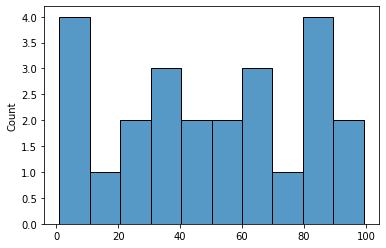

In [65]:
sns.histplot(zero_df.sum() / 216, bins=10)

In [68]:
((zero_df.sum() / 216) < 70).value_counts()

True     17
False     7
dtype: int64

In [46]:
import seaborn as sns

In [53]:
nonzero_df = ~zero_df

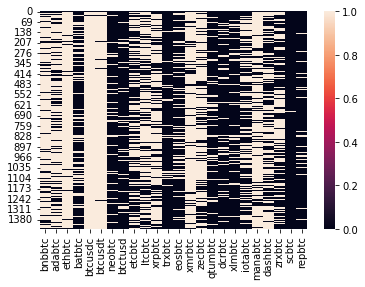

In [63]:
ax = sns.heatmap(nonzero_df.loc[:1440])

<AxesSubplot:>

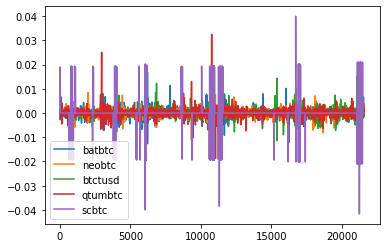

In [37]:
all_returns_df[['batbtc', 'neobtc', 'btctusd', 'qtumbtc', 'scbtc']].plot()